***
# Sales Prediction
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 5)

## 1. Data Preprocessing 

In [5]:
# drop column 

df.drop(columns=["Unnamed: 0"], inplace=True)
df.sample(5)

,TV,Radio,Newspaper,Sales
97,184.9,21.0,22.0,15.5
0,230.1,37.8,69.2,22.1
172,19.6,20.1,17.0,7.6
35,290.7,4.1,8.5,12.8
75,16.9,43.7,89.4,8.7


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## 2. Exploratory Data Analysis (EDA)

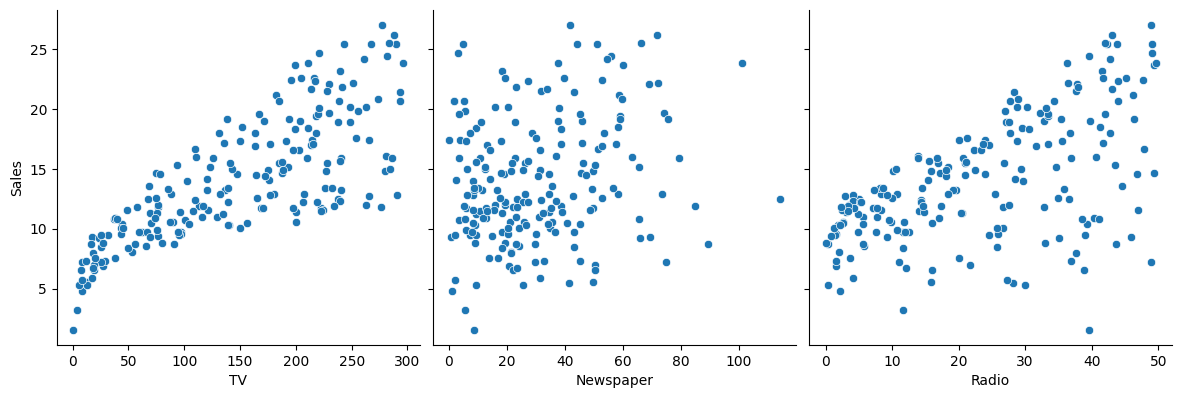

In [8]:
sns.pairplot(df, x_vars=['TV','Newspaper','Radio'],
            y_vars='Sales',height=4,aspect=1 , kind='scatter')
plt.show()

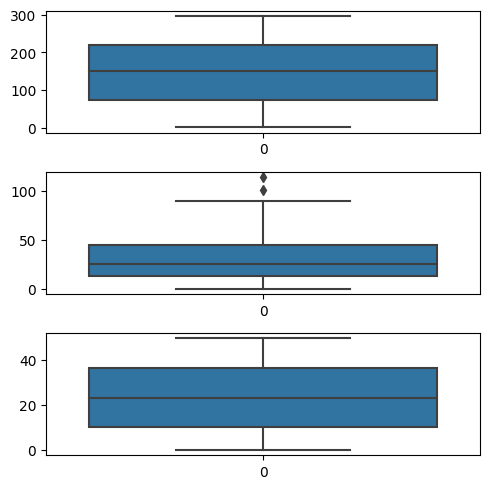

In [9]:
fig,axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

In [10]:
# outliers in Newspaper

df[df["Newspaper"]>90]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


<AxesSubplot: >

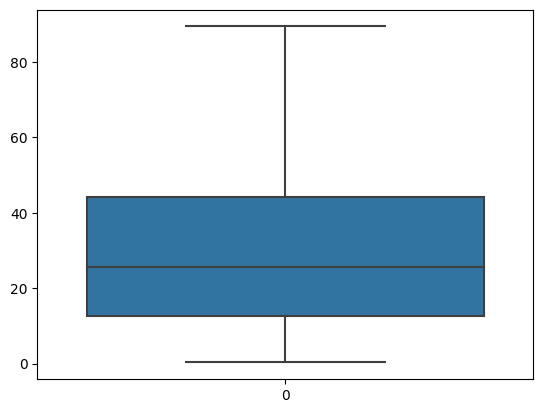

In [11]:
# removing outliers

df = df[df["Newspaper"]<=90]
sns.boxplot(df['Newspaper'])

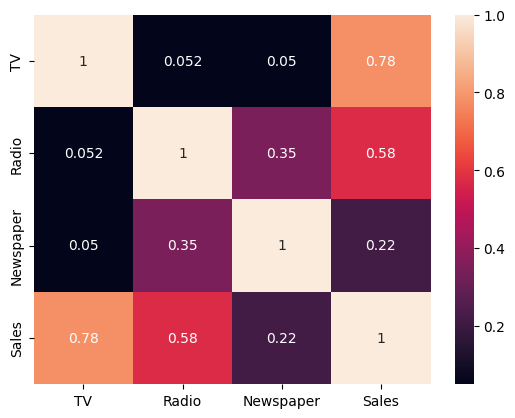

In [12]:
sns.heatmap(df.corr(), annot=True)
plt.show()

## 3. Model Building

In [13]:
X = df.drop(columns="Sales")
Y = df["Sales"]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [16]:
lr=LinearRegression()

In [17]:
lr.fit(X_train,Y_train)

LinearRegression()

In [18]:
Y_pred=lr.predict(X_test)

In [19]:
r2_score(Y_test,Y_pred)

0.87281805413879

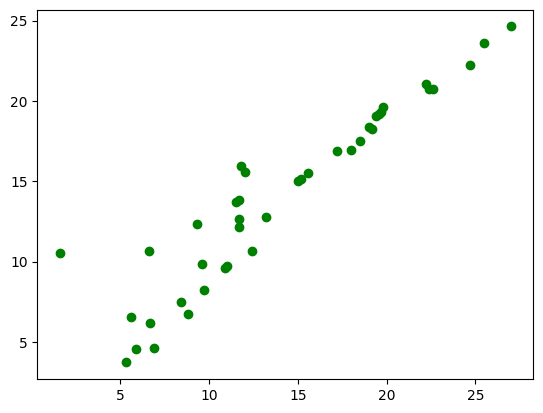

In [20]:
plt.scatter(Y_test,Y_pred,c='g')